In [276]:
# http://127.0.0.1:5000/guess_article/7629286/limit/8

In [277]:
import requests 
import random 
import time 

choices = list('abcdefghijklmnopqrstuvwxyz')

def get_string():
    string = ''
    n_letters = int(random.random() * 3) + 1
    for _ in range(n_letters):
        string = string + random.choice(choices)
    return string

times = []
for _ in range(10000):
    start = time.time()
    string = get_string()
    # try:
    r = requests.get(f'http://127.0.0.1:5000/suggestion/{string}/limit/20')
    r.raise_for_status()
    times.append({'string': string, 'time': time.time() - start})
    # except Exception as e:
    #     times.append({'error': True})

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /suggestion/ozn/limit/20 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000015636377E00>: Failed to establish a new connection: [WinError 10048] Only one usage of each socket address (protocol/network address/port) is normally permitted'))

In [ ]:
# 6.644226312637329
# 52.35668611526489

59.93390989303589


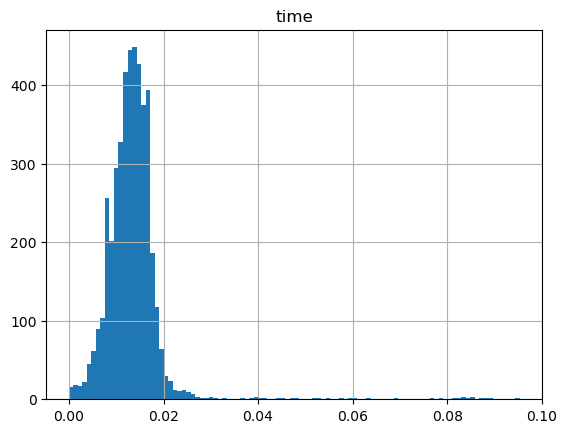

In [ ]:
import pandas as pd

df = pd.DataFrame(times)
df.hist(bins=100)

print(df.time.sum())

In [ ]:
df.sort_values('time').tail(20)
len(df[df.error == True]) / len(df)

0.5522